### Import package

In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/admin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/admin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Transform

In [11]:
json_path = "missions/W2/M5/reviews.jsonl"
df = pd.read_json(json_path, lines=True)
df

,rating,quote,reviewId,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,creationDate,userAccountLink,userDisplayName,userRealm,userId,userImageUrl
0,4.0,"Good show, koreans really do their survial gam...",c5356d7f-1c94-432f-bc4e-42f795bc16d3,False,False,False,False,4.0,"Feb 13, 2024",/profiles/DQ6HBYuVrT2PfBqtzkuvgseDcLLCwLTMeSZ4...,John S,RT,e8c3d81f-5285-4cb6-9c64-af8bf9d994cc,NaN
1,4.0,I almost stopped watching this after a couple ...,75ca6438-913d-484b-8679-34f95a001846,False,False,False,False,4.0,"Feb 10, 2024",/profiles/lx8hYRSgOFyZtwmujNi86iWvUooCp2FW1SAk...,J M,RT,629db44c-c220-4395-8a93-f0dc12a40163,NaN
2,5.0,"This show was pretty exciting and dramatic, th...",29aa9a82-e7b9-4ae9-b471-9a06d6960988,False,False,False,False,5.0,"Feb 6, 2024",/profiles/9X2soPCMzuMDswvhexuGZSbAh88CXMcnQIOG...,Tony P,RT,1e8e6b26-ea19-48b3-892b-493aa242887a,NaN
3,4.5,wow that was really something,a0b50dc6-f6f6-4335-bc20-805769a3df75,False,False,False,False,4.5,"Dec 31, 2023",/profiles/JBqsYgfvgT40SkvuKwfyounbtbbCedH2BFXo...,peepslovemyswagger 1,RT,1c52b3bd-0933-465a-b4a1-9f905b39ba72,NaN
4,5.0,"Loved it! Unique, original — the suspension wa...",eb4cd8fa-7bb0-42ab-931b-65aec8aea630,False,False,False,False,5.0,"Dec 18, 2023",/profiles/2dOFWzTZYin9u9vfeWIgvS18hxxCb8f6XSL9...,Curtis M,RT,95483726-32cf-4d2a-aad9-e161b58379a0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,3.0,Korean shows rarely disappoint. Always willing...,8c97bad6-2aa1-4986-b264-0cb8948c3102,False,False,False,False,3.0,"Jun 9, 2024",/profiles/DGehBQInGi2nCDnFzxIvjhjJHLLCwnhMJIZ4...,Master G,RT,67489760-678e-49e4-8649-61d47dcbec19,NaN
2114,5.0,Had my eyes glued to the screen since episode ...,28e2a1f2-59c9-4df0-8b58-9c89494b19d7,False,False,False,False,5.0,"May 12, 2024",/profiles/m8XuD9saVIeXI89Sd9hQzfB4FVVCoMSJvhRd...,Star S,RT,81aa2639-26f3-4545-b982-87ba0429e3a1,NaN
2115,4.5,Now that's some good tv.,3e8efac9-e22d-4204-9fe2-1a62953bfcb5,False,False,False,False,4.5,"Apr 21, 2024",/profiles/WY9hQOUD9uGOI9ofWMSogIRnTGGCmBcwpiaM...,Andrew D,RT,6e8732a5-f4fe-49ab-accf-46210c5db0b8,NaN
2116,4.0,Solid show althought it is a bit predictable a...,3a11dfa8-f78f-42b4-9ad7-0583104afd00,False,False,False,False,4.0,"Feb 29, 2024",/profiles/QDrf6xhmgikwFeWuvgSJGHLJi66CBMS6jHyJ...,Tijs v,RT,364cb2d4-a059-4f24-95eb-a5962db8e9c8,NaN


In [12]:
df.drop_duplicates(subset=['reviewId'], inplace=True)
df.shape

(1119, 14)

### Cleansing

In [13]:
# only unicode
not_eng = df["quote"].str.contains("[^\x00-\x7F]", regex=True)
df[not_eng]

,rating,quote,reviewId,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,creationDate,userAccountLink,userDisplayName,userRealm,userId,userImageUrl
4,5.0,"Loved it! Unique, original — the suspension wa...",eb4cd8fa-7bb0-42ab-931b-65aec8aea630,False,False,False,False,5.0,"Dec 18, 2023",/profiles/2dOFWzTZYin9u9vfeWIgvS18hxxCb8f6XSL9...,Curtis M,RT,95483726-32cf-4d2a-aad9-e161b58379a0,NaN
32,3.5,약간 과대평가되었지만 좋습니다!!!!!,75d0079f-35f0-4ad7-af36-c6788deced6d,False,False,False,False,3.5,"Jun 4, 2023",/profiles/AlgS20sGNSkQHpYF6VuZGtKmSaaC2VFxvHqB...,lee d,RT,2d2098b2-900e-4e95-851c-258a11648a7d,NaN
37,3.0,Una serie con una premisa que aunque ya hemos ...,e7f6c47f-f89e-408a-bce8-6223c0a092b4,False,False,False,False,3.0,"May 25, 2023",/profiles/9kltBxfOnC1rSwNuewcx0FpAu88CJ6hn4cOv...,Black B,RT,d3b28fcb-6f5f-4c71-9451-881537a56b0a,NaN
53,4.0,Cómo Squid Game metaforiza y crítica la explot...,c7b8dcc9-d56f-4167-ae69-cf983ad74250,False,False,False,False,4.0,"Jan 7, 2023",/profiles/or6sXrSJYS91sN6saGCaXuZQF66CJrSlPuza...,Daniel B,RT,1a211e89-28ce-4a6e-9e1f-31d05443967a,NaN
80,4.0,A very cruel and bleak view on humanity and so...,9aa60fdc-8a4b-4dfb-94fd-233fcf4046a3,False,False,False,False,4.0,"Sep 2, 2022",/profiles/wLef6ahmwiv0IqBCNwU0ltoOSVVCbMHD4UPn...,martin f,RT,364aefb2-0aa1-4a71-99b3-63a9449541f8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,4.5,Direção: Bom\nAtuação: Ok\nRoteiro: Bom\nCarac...,12e79cc0-0b62-4578-a666-566354a2751b,False,False,False,False,4.5,"Nov 7, 2024",/profiles/pZ2ikvtw4cpYsypTl6sxZF0yTRRC92sYWuXY...,Wendel L,RT,4df151c5-ec18-486e-a453-21c8672b09c0,NaN
2100,5.0,I don’t need to say anything more,784c72b6-7ced-4095-a403-1cd07000cfab,False,False,False,False,5.0,"Sep 5, 2024",/profiles/v68C9yFjku4BF9KIGJu64FZ9tWWCjBHvyFZk...,NaN,RT,9ebb789c-0966-4292-8ff0-edcd2519d4f7,NaN
2103,4.5,"Disturbingly brilliant, and couldn’t get enoug...",8fee3963-9251-4d12-96d1-37c34eba3468,False,False,False,False,4.5,"Aug 19, 2024",/profiles/oOWcDrTJMI94iN4haruarsZmh66C0NC6Jsva...,Emotional D,RT,a5746b16-fc7e-4259-b14d-4e5a83e0a811,NaN
2112,5.0,Greatest TV show ever period! It’s a must watc...,0584061e-6752-4ef8-bc86-b061780ccf32,False,False,False,False,5.0,"Jun 14, 2024",/profiles/bpKtakIl1iMRFBAiGnHvzs8BSbbCxGCweiKP...,Chris T,RT,d749401c-e430-4c6a-b3db-8234a4d729b9,NaN


In [14]:
df_eng = df[~not_eng]
df_eng.shape

(1020, 14)

In [15]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [16]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def get_wordnet_pos(tag):
    """Penn Treebank 태그를 WordNet 품사 태그로 변환"""
    if tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN  # 기본값

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    # 유지할 품사 태그
    meaningful_tags = [
        'NN', 'NNS', 'NNP', 'NNPS',  # 명사류
        'JJ', 'JJR', 'JJS',          # 형용사류
        'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'  # 동사류
    ]
    
    # 품사 태깅
    tagged = nltk.pos_tag(tokens)
    
    # 품사 필터링과 레마타이제이션을 동시에 수행
    meaningful_tokens = [
        lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
        for word, tag in tagged 
        if tag in meaningful_tags
    ]

    return " ".join(meaningful_tokens)

In [17]:
df_eng['processed_quote'] = df_eng['quote'].apply(preprocess_text)
df_eng['processed_quote']

/var/folders/1g/5q0t9z_x5d7cmbbzfbhwgrb00000gn/T/ipykernel_93935/2882694618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng['processed_quote'] = df_eng['quote'].apply(preprocess_text)


0                  good show korean survial game japanese
1       stop watch couple episode dislike anything was...
2          show exciting dramatic cliffhanger season cool
3                                           wow something
5       interest compelling storyline overhyped sure m...
                              ...                        
2111    wow something people money higley recommend su...
2113    korean show disappoint willing think box afrai...
2114                              eye glue screen episode
2115                                        thats good tv
2116    solid show althought bit predictable time dont...
Name: processed_quote, Length: 1020, dtype: object

In [18]:
criteria = 2.5
negative = df_eng[df_eng['score'] <= criteria]
positive = df_eng[df_eng['score'] > criteria]

In [19]:
neg_len = len(negative)
pos_len = len(positive)
total_len = len(df)
print(f"전체 리뷰 수: {total_len}")
print(f"부정 리뷰 수: {neg_len}")
print(f"긍정 리뷰 수: {pos_len}")

전체 리뷰 수: 1119
부정 리뷰 수: 169
긍정 리뷰 수: 851


In [20]:
# 단어 빈도수 계산
from collections import Counter

def get_word_freq_df(text_series):
    words = ' '.join(text_series).split()
    word_freq = Counter(words)
    return pd.DataFrame(word_freq.items(), columns=['word', 'count'])

word_df_negative = get_word_freq_df(negative['processed_quote'])
word_df_positive = get_word_freq_df(positive['processed_quote'])

# 상위 1% 빈도 임계값 계산
threshold_positive = word_df_positive['count'].quantile(0.99)
threshold_negative = word_df_negative['count'].quantile(0.99)

# 양쪽 모두에서 빈도가 높은 단어 찾기
common_df = pd.merge(
    word_df_positive[['word', 'count']],
    word_df_negative[['word', 'count']],
    on='word',
    how='inner',
    suffixes=('_positive', '_negative')
)

# 양쪽 모두에서 상위 1%인 단어 필터링
common_frequent_words = common_df[
    (common_df['count_positive'] >= threshold_positive) &
    (common_df['count_negative'] >= threshold_negative)
]['word']

# 워드클라우드 생성을 위한 텍스트 준비
neg_filtered = ' '.join(word_df_negative[~word_df_negative['word'].isin(common_frequent_words)]['word'])
pos_filtered = ' '.join(word_df_positive[~word_df_positive['word'].isin(common_frequent_words)]['word'])

### Wordcloud

In [21]:
from wordcloud import (
    WordCloud, 
    STOPWORDS,
    )

In [22]:
custom_stopwords = [
    'show',
    'series',
    'good',
    'bad',
    'game',
    'episode',
    'much',
    'show',
    'season',
]
for word in custom_stopwords:
    STOPWORDS.add(word)

In [23]:
neg_wc = WordCloud(background_color='white').generate(neg_filtered)
pos_wc = WordCloud(background_color='white').generate(pos_filtered)
    

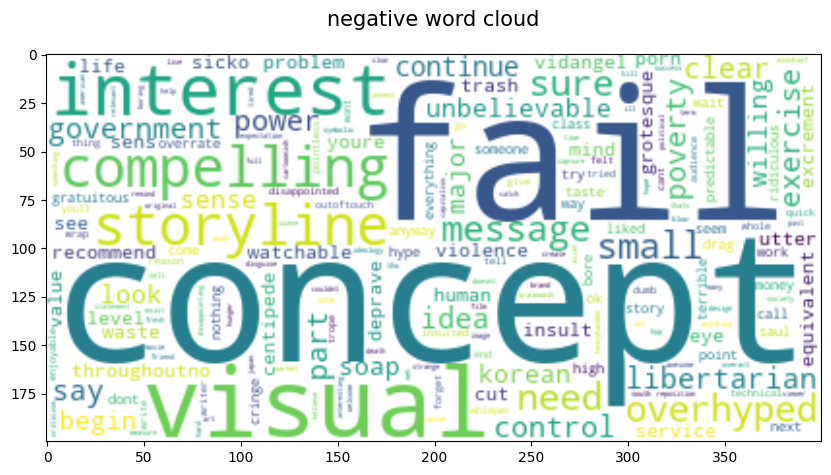

In [24]:
# 1. 먼저 figure를 생성합니다
plt.figure(figsize=(10, 6))

# 3. 워드클라우드를 표시합니다
plt.imshow(neg_wc, interpolation='bilinear')

# 4. 타이틀을 추가합니다
plt.title("negative word cloud", pad=20, size=15)

# 6. 마지막으로 그래프를 표시합니다
plt.show()

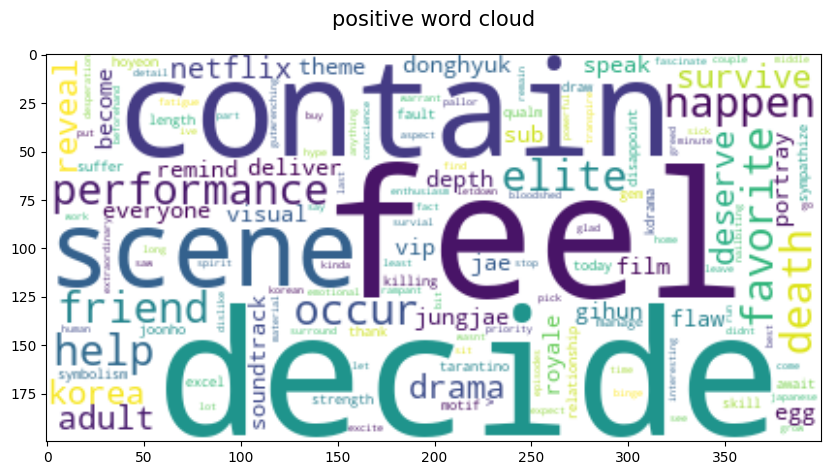

In [25]:
# 1. 먼저 figure를 생성합니다
plt.figure(figsize=(10, 6))

# 3. 워드클라우드를 표시합니다
plt.imshow(pos_wc, interpolation='bilinear')

# 4. 타이틀을 추가합니다
plt.title("positive word cloud", pad=20, size=15)

# 6. 마지막으로 그래프를 표시합니다
plt.show()

### 감성이 더 많을 수 밖에 없음. 
### 이유 -> 감성이기 때문에 사람마다 느끼는 감성은 공통되지만, 그 이유는 다를 수 있음.

### 이유만 찾는 방법을 생각해보는 것도 좋을 듯. 그러면 다음 시즌에 더 신경써야 할 부분을 찾아낼 수 있음.

### TODO: IMDb도 추가하기 (HTML은 받음)

In [ ]:
https://www.rottentomatoes.com/napi/season/c156dad3-ec06-3b36-8dd6-9368b41284e4/reviews/all?after=MQ==&pageCount=10000

squid_game_1 = "c156dad3-ec06-3b36-8dd6-9368b41284e4"
max_page = 200
squid_game_2 = "3f0a0478-c57a-3fc6-8ec1-e4dd8f1e41fb"
baseurl = "https://www.rottentomatoes.com/napi/season"
end_cursor = "eyJyZWFsbV91c2VySWQiOiJSVF8xZGVhYmYwMi01MzlkLTQ2MTEtYmFhNS1kY2NlYzJjNmRhNTYiLCJlbXNJZCI6ImMxNTZkYWQzLWVjMDYtM2IzNi04ZGQ2LTkzNjhiNDEyODRlNCIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6ImMxNTZkYWQzLWVjMDYtM2IzNi04ZGQ2LTkzNjhiNDEyODRlNF9UIiwiY3JlYXRlRGF0ZSI6IjIwMjQtMDItMTdUMjI6NDk6MzQuNzU2WiJ9"
is_before = False
if is_before:
    full_url = f"{baseurl}/{squid_game_1}/reviews/user?before={end_cursor}&pageCount={max_page}"
else:
    full_url = f"{baseurl}/{squid_game_1}/reviews/user?after={end_cursor}&pageCount={max_page}"
urls = [

    ]
reviews = []
# "pageInfo": {
#     "hasNextPage": false,
#     "hasPreviousPage": true,
#     "startCursor": "eyJyZWFsbV91c2VySWQiOiJSVF82MjlkYjQ0Yy1jMjIwLTQzOTUtOGE5My1mMGRjMTJhNDAxNjMiLCJlbXNJZCI6ImMxNTZkYWQzLWVjMDYtM2IzNi04ZGQ2LTkzNjhiNDEyODRlNCIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6ImMxNTZkYWQzLWVjMDYtM2IzNi04ZGQ2LTkzNjhiNDEyODRlNF9UIiwiY3JlYXRlRGF0ZSI6IjIwMjQtMDItMTBUMTk6Mzc6MDMuNzM2WiJ9"
# }    
squid_game_1 = "c156dad3-ec06-3b36-8dd6-9368b41284e4"
max_page = 200
squid_game_2 = "3f0a0478-c57a-3fc6-8ec1-e4dd8f1e41fb"
baseurl = "https://www.rottentomatoes.com/napi/season"
end_cursor = "eyJyZWFsbV91c2VySWQiOiJSVF8xZGVhYmYwMi01MzlkLTQ2MTEtYmFhNS1kY2NlYzJjNmRhNTYiLCJlbXNJZCI6ImMxNTZkYWQzLWVjMDYtM2IzNi04ZGQ2LTkzNjhiNDEyODRlNCIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6ImMxNTZkYWQzLWVjMDYtM2IzNi04ZGQ2LTkzNjhiNDEyODRlNF9UIiwiY3JlYXRlRGF0ZSI6IjIwMjQtMDItMTdUMjI6NDk6MzQuNzU2WiJ9"
is_before = False
while True:                
    if is_before:
        full_url = f"{baseurl}/{squid_game_1}/reviews/user?before={end_cursor}&pageCount={max_page}"
    else:
        full_url = f"{baseurl}/{squid_game_1}/reviews/user?after={end_cursor}&pageCount={max_page}"

    fetched_data = rt_fetch_json(full_url)        
    reviews.extend(fetched_data['reviews'])

    print("받은 리뷰 수:",  len(fetched_data['reviews']))
    print("총 리뷰 수:", len(reviews))

    if is_before:
        if fetched_data['pageInfo']['hasPreviousPage']:
            end_cursor = fetched_data['pageInfo']['startCursor']
        else:
            break
    else:
        if fetched_data['pageInfo']['hasNextPage']:
            end_cursor = fetched_data['pageInfo']['endCursor']
        else:
            is_before = True